## Credit Card Lead Prediction

problem statement-

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

This dataset was part of May 2021 Jobathon conducted my analytics vidhya, for more info check:https://datahack.analyticsvidhya.com/contest/job-a-thon-2/

PS: As a beginner i have done lots of mistake so use this as a base model and try to explore

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv('train_.csv')
test= pd.read_csv('test_.csv')

## dataset exploration

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
train.shape,test.shape

((245725, 11), (105312, 10))

In [6]:
train.dtypes,test.dtypes

(ID                     object
 Gender                 object
 Age                     int64
 Region_Code            object
 Occupation             object
 Channel_Code           object
 Vintage                 int64
 Credit_Product         object
 Avg_Account_Balance     int64
 Is_Active              object
 Is_Lead                 int64
 dtype: object, ID                     object
 Gender                 object
 Age                     int64
 Region_Code            object
 Occupation             object
 Channel_Code           object
 Vintage                 int64
 Credit_Product         object
 Avg_Account_Balance     int64
 Is_Active              object
 dtype: object)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
ID                     105312 non-null object
Gender                 105312 non-null object
Age                    105312 non-null int64
Region_Code            105312 non-null object
Occupation             105312 non-null object
Channel_Code           105312 non-null object
Vintage                105312 non-null int64
Credit_Product         92790 non-null object
Avg_Account_Balance    105312 non-null int64
Is_Active              105312 non-null object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [9]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [10]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


### Data analysis

In [11]:
print(train.isnull().sum()),print(test.isnull().sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


(None, None)

In [12]:
print(train.nunique()),print(test.nunique())

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64
ID                     105312
Gender                      2
Age                        62
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance     78315
Is_Active                   2
dtype: int64


(None, None)

In [13]:
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [14]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [15]:
# i have assume that if customer is active then customer having some Credit_Product 
# train['Credit_Product'] = train.Credit_Product.fillna(train['Is_Active'])
# test['Credit_Product'] = test.Credit_Product.fillna(test['Is_Active'])  

In [16]:
train['Credit_Product'].replace(np.nan,'Yes',inplace=True)
test['Credit_Product'].replace(np.nan,'Yes',inplace=True)


In [17]:
print(train.isnull().sum()),print(test.isnull().sum())

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64
ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64


(None, None)

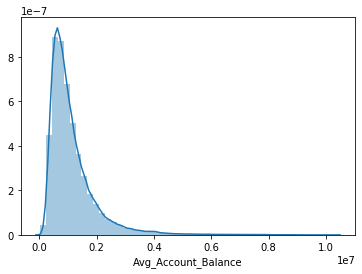

In [18]:
sns.distplot(train['Avg_Account_Balance'])# as it is skewed we use log normal 
plt.show()

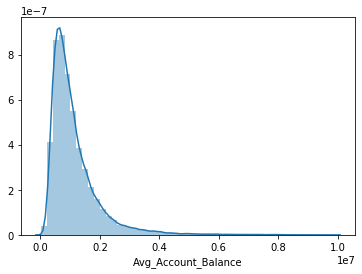

In [19]:
sns.distplot(test['Avg_Account_Balance'])# as it is skewed we use log normal 
plt.show()

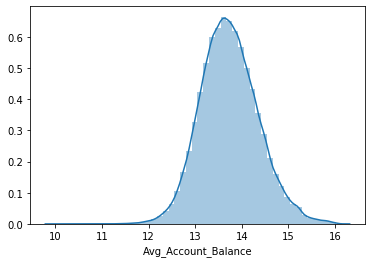

In [20]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])
sns.distplot(train['Avg_Account_Balance'])
plt.show()

In [21]:
train.set_index("ID", inplace = True)
test.set_index("ID", inplace = True)
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,13.860193,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,13.274205,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,14.210464,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,13.061453,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,13.695360,No,0


In [22]:
cat_var=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_var:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [24]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,0,73,18,1,2,43,0,13.860193,0,0
IDD62UNG,0,30,27,2,0,32,0,13.274205,0,0
HD3DSEMC,0,56,18,3,2,26,0,14.210464,1,0
BF3NC7KV,1,34,20,2,0,19,0,13.061453,0,0
TEASRWXV,0,30,32,2,0,33,0,13.695360,0,0


In [25]:
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,1,29,4,1,0,25,1,13.517598,0
CCMEWNKY,1,43,18,1,1,49,1,13.738129,0
VK3KGA9M,1,31,20,2,0,14,0,12.282798,0
TT8RPZVC,1,29,22,1,0,33,0,13.674028,0
SHQZEYTZ,0,29,20,1,0,19,0,13.395572,0


In [26]:
X = train.drop('Is_Lead',axis=1)
y = train['Is_Lead']

In [27]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
NNVBBKZB,0,73,18,1,2,43,0,13.860193,0
IDD62UNG,0,30,27,2,0,32,0,13.274205,0
HD3DSEMC,0,56,18,3,2,26,0,14.210464,1
BF3NC7KV,1,34,20,2,0,19,0,13.061453,0
TEASRWXV,0,30,32,2,0,33,0,13.695360,0


In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X, y)


In [29]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 

In [30]:
X_trainC, X_test, y_trainC, y_test = train_test_split(X_train,y_train, random_state=42,test_size=0.33)

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_trainC, y_trainC)
dt_predicted_Y = dtree.predict(X_test)
acc_dtree = accuracy_score(y_test, dt_predicted_Y)*100
acc_dtree

74.32442263699488

In [34]:
rfm = RandomForestClassifier()
rfm.fit(X_trainC, y_trainC)
rfm_predicted_Y = rfm.predict(X_test)
acc_rfm = accuracy_score(y_test, rfm_predicted_Y)*100
acc_rfm

81.99484273577508

In [40]:
xgb = XGBClassifier(n_estimators=20000, 
             max_depth= 6, 
             learning_rate= 0.0201, 
             reg_lambda=29.326, 
             subsample= 0.818, 
             colsample_bytree=0.235, 
             colsample_bynode= 0.820, 
             colsample_bylevel= 0.453).fit(X_trainC, y_trainC)
xgb_predicted_Y = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, xgb_predicted_Y)*100
acc_xgb

[17:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


78.50681842064846

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier()
GBM.fit(X_trainC, y_trainC)
gbm_predicted_Y = GBM.predict(X_test)
acc_gbm = accuracy_score(y_test, gbm_predicted_Y)*100
acc_gbm

77.8771148420891

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb

In [38]:
clf = ExtraTreesClassifier()
clf.fit(X_trainC, y_trainC)
clf_predicted_Y = clf.predict(X_test)
acc_clf = accuracy_score(y_test, clf_predicted_Y)*100
acc_clf

82.58897897485228

In [39]:
model = ltb.LGBMClassifier()
model.fit(X_trainC, y_trainC)
ltb_predicted_Y = model.predict(X_test)
ltb_clf = accuracy_score(y_test, ltb_predicted_Y)*100
ltb_clf


78.28048080576191

In [42]:
prediction = clf.predict(test)

In [43]:
submission = pd.DataFrame({'ID': test.index,
                    'Is_Lead': prediction})

submission.to_csv("submission.csv", index=False)